In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np


In [4]:
iris_df = pd.read_csv('data/iris.csv')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
missing_data = iris_df.isnull().sum()
print("Brakujące dane:\n", missing_data)

Brakujące dane:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [6]:
print("Podstawowe statystyki:\n", iris_df.describe())

print("Informacje o danych:\n")
iris_df.info()

Podstawowe statystyki:
        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
Informacje o danych:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: f

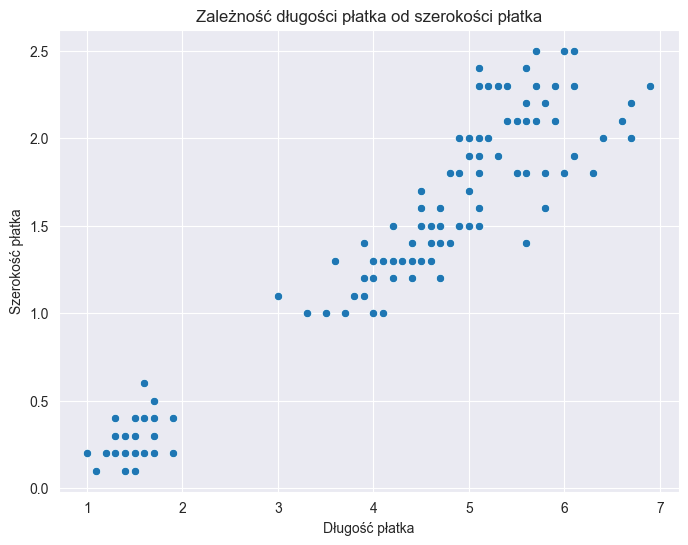

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='petal_length', y='petal_width', data=iris_df)
plt.xlabel('Długość płatka')
plt.ylabel('Szerokość płatka')
plt.title('Zależność długości płatka od szerokości płatka')
plt.show()

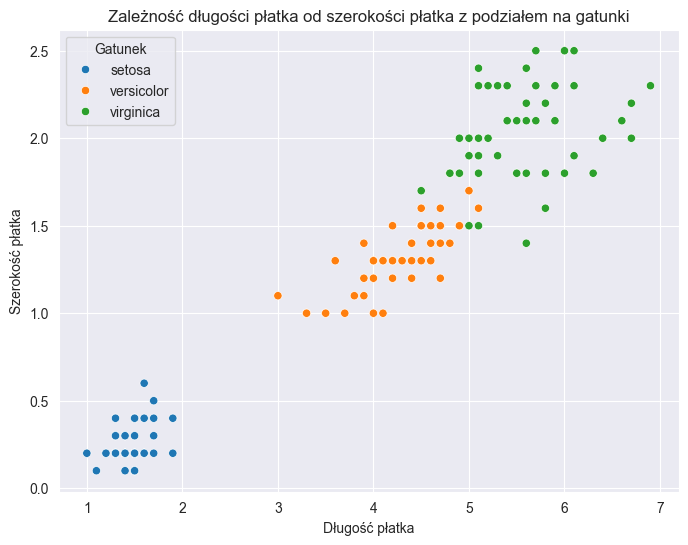

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris_df)
plt.xlabel('Długość płatka')
plt.ylabel('Szerokość płatka')
plt.title('Zależność długości płatka od szerokości płatka z podziałem na gatunki')
plt.legend(title='Gatunek')
plt.show()

In [9]:
df_iris = iris_df.drop(columns=['species'])
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_iris_std = pd.DataFrame(scaler.fit_transform(df_iris), columns=df_iris.columns)
df_iris_std.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [11]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
df_iris_norm = pd.DataFrame(min_max_scaler.fit_transform(df_iris), columns=df_iris.columns)
df_iris_norm.head()


,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


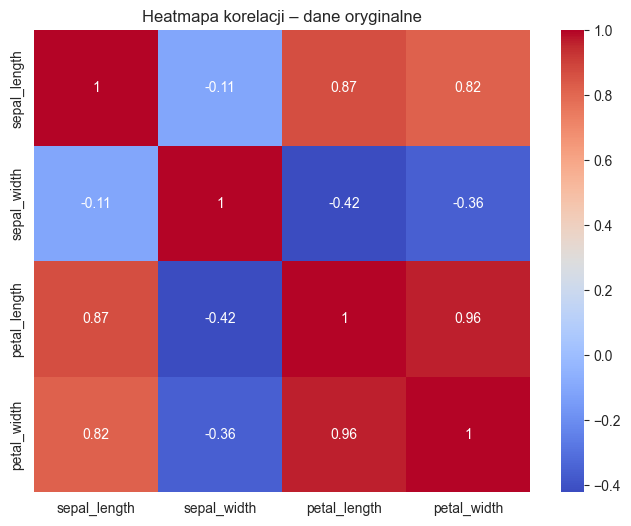

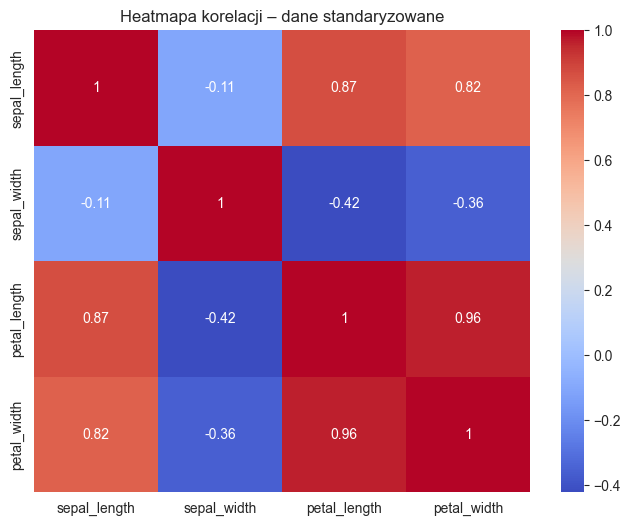

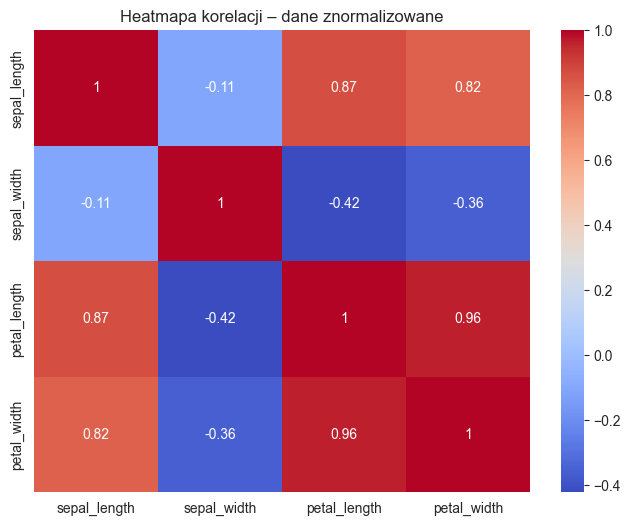

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(df_iris.corr(), annot=True, cmap='coolwarm', cbar=True)
plt.title('Heatmapa korelacji – dane oryginalne')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df_iris_std.corr(), annot=True, cmap='coolwarm', cbar=True)
plt.title('Heatmapa korelacji – dane standaryzowane')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df_iris_norm.corr(), annot=True, cmap='coolwarm', cbar=True)
plt.title('Heatmapa korelacji – dane znormalizowane')
plt.show()

In [13]:
from sklearn.cluster import AgglomerativeClustering

linkage_methods = ['ward', 'single', 'complete']

hierarchical_labels = {}
for method in linkage_methods:
    clustering = AgglomerativeClustering(n_clusters=3, linkage=method)
    labels = clustering.fit_predict(df_iris)
    hierarchical_labels[method] = labels

hierarchical_labels

{'ward': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
        2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
        2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0]),
 'single': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
        0, 0, 0, 0, 0, 0, 0, 0

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(df_iris)

kmeans_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [26]:
import pandas as pd

cluster_results = pd.DataFrame({
    'Ward': hierarchical_labels['ward'],
    'Single Linkage': hierarchical_labels['single'],
    'Complete Linkage': hierarchical_labels['complete'],
    'K-means': kmeans_labels,
    'Species': iris_df['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})
})

cluster_results.head()

,Ward,Single Linkage,Complete Linkage,K-means,Species
0,1,1,1,1,0
1,1,1,1,1,0
2,1,1,1,1,0
3,1,1,1,1,0
4,1,1,1,1,0


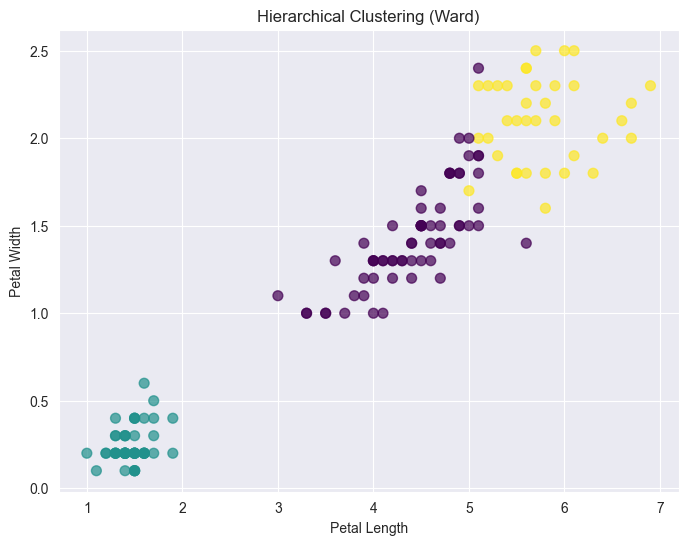

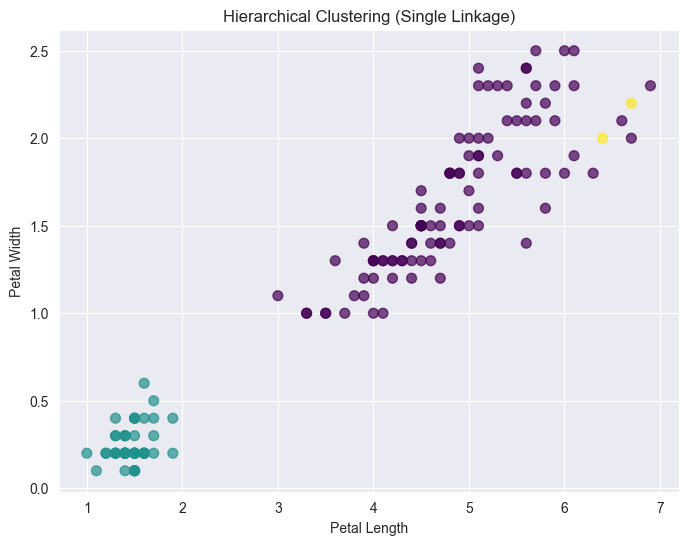

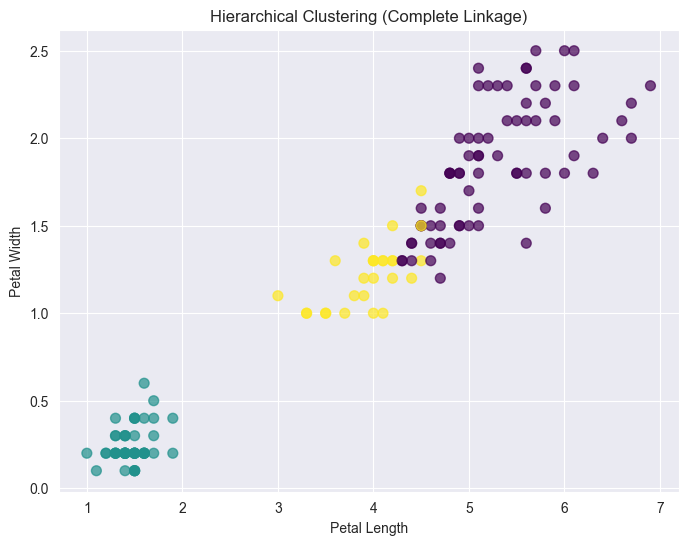

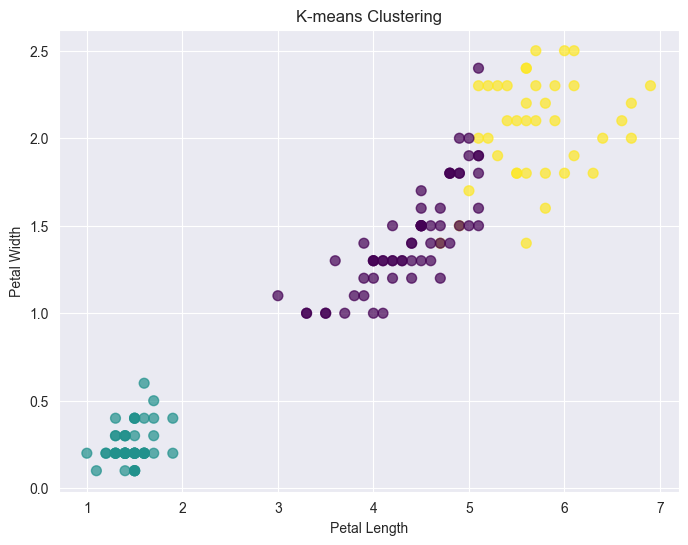

In [16]:
import matplotlib.pyplot as plt

def plot_clusters(data, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data['petal_length'], data['petal_width'], c=labels, cmap='viridis', s=50, alpha=0.7)
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.title(title)
    plt.show()

plot_clusters(df_iris, hierarchical_labels['ward'], 'Hierarchical Clustering (Ward)')
plot_clusters(df_iris, hierarchical_labels['single'], 'Hierarchical Clustering (Single Linkage)')
plot_clusters(df_iris, hierarchical_labels['complete'], 'Hierarchical Clustering (Complete Linkage)')
plot_clusters(df_iris, kmeans_labels, 'K-means Clustering')

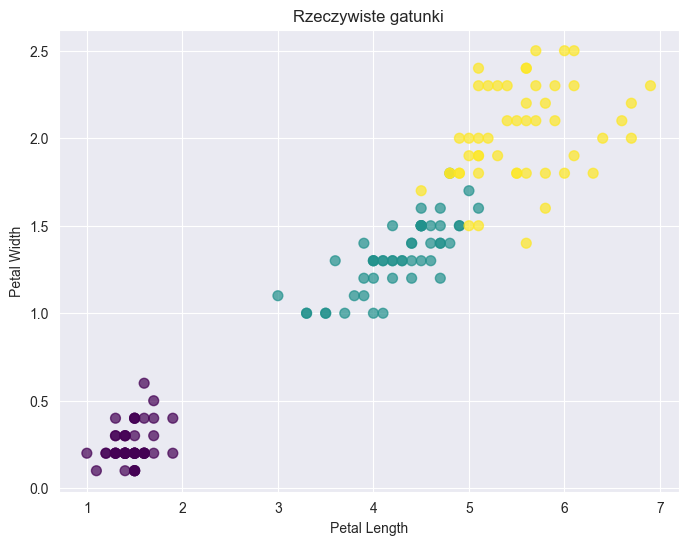

In [25]:

plot_clusters(df_iris, iris_df['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2}), 'Rzeczywiste gatunki')


In [18]:

hierarchical_labels_std = {}
for method in linkage_methods:
    clustering = AgglomerativeClustering(n_clusters=3, linkage=method)
    labels_std = clustering.fit_predict(df_iris_std)
    hierarchical_labels_std[method] = labels_std

kmeans_labels_std = KMeans(n_clusters=3, random_state=0).fit_predict(df_iris_std)


In [19]:
hierarchical_labels_norm = {}
for method in linkage_methods:
    clustering = AgglomerativeClustering(n_clusters=3, linkage=method)
    labels_norm = clustering.fit_predict(df_iris_norm)
    hierarchical_labels_norm[method] = labels_norm

kmeans_labels_norm = KMeans(n_clusters=3, random_state=0).fit_predict(df_iris_norm)

In [23]:
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from scipy.stats import mode

# Wczytanie danych
iris_df = pd.read_csv('data/iris.csv')

# Mapowanie etykiet gatunków na liczby całkowite
true_species = iris_df['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

# Funkcja do obliczania zgodności
def calculate_accuracy(true_labels, cluster_labels):
    labels = np.zeros_like(cluster_labels)
    for i in range(3):
        mask = (cluster_labels == i)
        labels[mask] = mode(true_labels[mask])[0]
    return accuracy_score(true_labels, labels) * 100

# Obliczenie zgodności dla danych oryginalnych
accuracies = {
    'Ward': calculate_accuracy(true_species, hierarchical_labels['ward']),
    'Single Linkage': calculate_accuracy(true_species, hierarchical_labels['single']),
    'Complete Linkage': calculate_accuracy(true_species, hierarchical_labels['complete']),
    'K-means': calculate_accuracy(true_species, kmeans_labels)
}

# Obliczenie zgodności dla danych standaryzowanych
accuracies_std = {
    'Ward': calculate_accuracy(true_species, hierarchical_labels_std['ward']),
    'Single Linkage': calculate_accuracy(true_species, hierarchical_labels_std['single']),
    'Complete Linkage': calculate_accuracy(true_species, hierarchical_labels_std['complete']),
    'K-means': calculate_accuracy(true_species, kmeans_labels_std)
}

# Obliczenie zgodności dla danych znormalizowanych
accuracies_norm = {
    'Ward': calculate_accuracy(true_species, hierarchical_labels_norm['ward']),
    'Single Linkage': calculate_accuracy(true_species, hierarchical_labels_norm['single']),
    'Complete Linkage': calculate_accuracy(true_species, hierarchical_labels_norm['complete']),
    'K-means': calculate_accuracy(true_species, kmeans_labels_norm)
}

print("Zgodność klasteryzacji z rzeczywistymi gatunkami (dane oryginalne):", accuracies)
print("Zgodność klasteryzacji z rzeczywistymi gatunkami (dane standaryzowane):", accuracies_std)
print("Zgodność klasteryzacji z rzeczywistymi gatunkami (dane znormalizowane):", accuracies_norm)


Zgodność klasteryzacji z rzeczywistymi gatunkami (dane oryginalne): {'Ward': 89.33333333333333, 'Single Linkage': 68.0, 'Complete Linkage': 84.0, 'K-means': 88.66666666666667}
Zgodność klasteryzacji z rzeczywistymi gatunkami (dane standaryzowane): {'Ward': 82.66666666666667, 'Single Linkage': 66.66666666666666, 'Complete Linkage': 78.66666666666666, 'K-means': 84.66666666666667}
Zgodność klasteryzacji z rzeczywistymi gatunkami (dane znormalizowane): {'Ward': 88.66666666666667, 'Single Linkage': 66.66666666666666, 'Complete Linkage': 88.0, 'K-means': 88.66666666666667}


In [24]:
import pandas as pd

results_df = pd.DataFrame({
    'Oryginalne': accuracies,
    'Standaryzowane': accuracies_std,
    'Znormalizowane': accuracies_norm
})

results_df

,Oryginalne,Standaryzowane,Znormalizowane
Ward,89.333333,82.666667,88.666667
Single Linkage,68.000000,66.666667,66.666667
Complete Linkage,84.000000,78.666667,88.000000
K-means,88.666667,84.666667,88.666667
